# Personal Key Indicators of Heart Disease

This dataset contains of 2020 annual CDC (Center for Disease Control) survey data of 400k adults in USA related to their health status.

#### Key objective of data analysis:
1. Analyse relation between heart diseases and various parameters.
2. See if there is significan inpact of alcohol, smoking and BMI to heart diseases.
3. Build a logistic model to predict heart disease.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as smf

In [2]:
df_raw = pd.read_csv('heart_2020_cleaned.csv')

In [3]:
df_raw.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
df_raw.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [5]:
print('AgeCategory:', df_raw['AgeCategory'].unique())
print('Race:', df_raw['Race'].unique())
print('Diabetic:', df_raw['Diabetic'].unique())
print('GenHealth:', df_raw['GenHealth'].unique())


AgeCategory: ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Race: ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Diabetic: ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
GenHealth: ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']


In [6]:
df = df_raw[df_raw.columns].replace({'Yes':1, 'No':0, 'Male':1, 'Female':0, 'No, borderline diabetes':0,'Yes (during pregnancy)':1})
df = df.rename(columns = {'Sex':'SexMale'})
df[['Smoking ','Sex','Alcohol Drinking', 'Diabetic ', 'Physical Activity','Asthma ','Kidney Disease' ]] = df_raw[['Smoking','Sex','AlcoholDrinking','Diabetic', 'PhysicalActivity','Asthma','KidneyDisease']].to_numpy()

In [7]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,SexMale,AgeCategory,...,Asthma,KidneyDisease,SkinCancer,Smoking,Sex,Alcohol Drinking,Diabetic,Physical Activity,Asthma,Kidney Disease
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,...,1,0,1,Yes,Female,No,Yes,Yes,Yes,No
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,...,0,0,0,No,Female,No,No,Yes,No,No
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,...,1,0,0,Yes,Male,No,Yes,Yes,Yes,No
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,...,0,0,1,No,Female,No,No,No,No,No
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,...,0,0,0,No,Female,No,No,Yes,No,No


In [8]:
df.describe().round(2)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,SexMale,Diabetic,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795.00,319795.00,319795.00,319795.00,319795.00,319795.00,319795.00,319795.00,319795.00,319795.00,319795.00,319795.00,319795.00,319795.00,319795.00
mean,0.09,28.33,0.41,0.07,0.04,3.37,3.90,0.14,0.48,0.14,0.78,7.10,0.13,0.04,0.09
std,0.28,6.36,0.49,0.25,0.19,7.95,7.96,0.35,0.50,0.34,0.42,1.44,0.34,0.19,0.29
min,0.00,12.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
25%,0.00,24.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,6.00,0.00,0.00,0.00
50%,0.00,27.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,7.00,0.00,0.00,0.00
75%,0.00,31.42,1.00,0.00,0.00,2.00,3.00,0.00,1.00,0.00,1.00,8.00,0.00,0.00,0.00
max,1.00,94.85,1.00,1.00,1.00,30.00,30.00,1.00,1.00,1.00,1.00,24.00,1.00,1.00,1.00


# Health status survey statistics

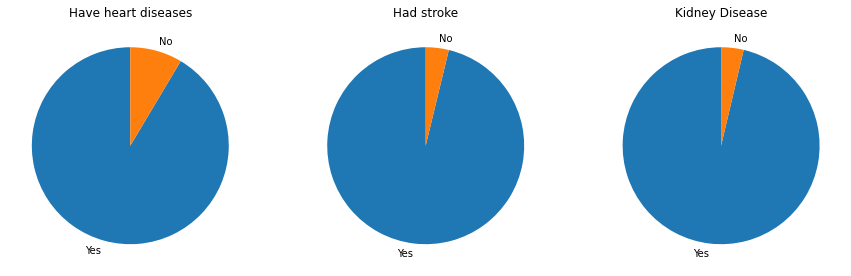

In [9]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(131)
cts = df.HeartDisease.value_counts().to_frame()
ax.pie(cts.HeartDisease, labels=('Yes', 'No'), startangle=90)
ax.set_title('Have heart diseases')

ax = fig.add_subplot(132)
cts = df.Stroke.value_counts().to_frame()
ax.pie(cts.Stroke, labels=('Yes', 'No'), startangle=90)
ax.set_title('Had stroke')

ax = fig.add_subplot(133)
cts = df.KidneyDisease.value_counts().to_frame()
ax.pie(cts.KidneyDisease, labels=('Yes', 'No'), startangle=90)
ax.set_title('Kidney Disease');

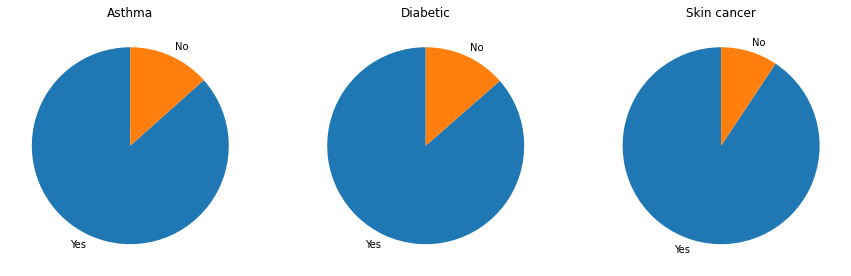

In [10]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(131)
cts = df.Asthma.value_counts().to_frame()
ax.pie(cts.Asthma, labels=('Yes', 'No'), startangle=90)
ax.set_title('Asthma')

ax = fig.add_subplot(132)
cts = df.Diabetic.value_counts().to_frame()
ax.pie(cts.Diabetic, labels=('Yes', 'No'), startangle=90)
ax.set_title('Diabetic')

ax = fig.add_subplot(133)
cts = df.SkinCancer.value_counts().to_frame()
ax.pie(cts.SkinCancer, labels=('Yes', 'No'), startangle=90)
ax.set_title('Skin cancer');

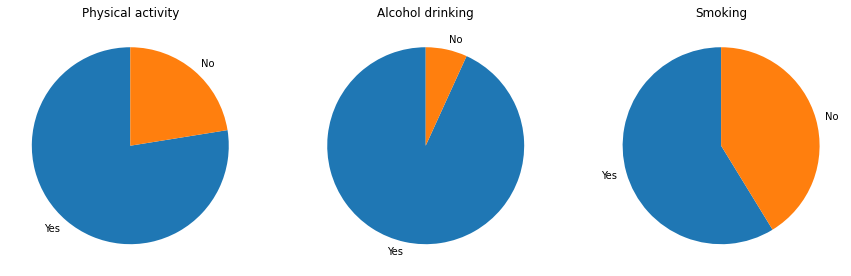

In [11]:
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(131)
cts = df.PhysicalActivity.value_counts().to_frame()
ax.pie(cts.PhysicalActivity, labels=('Yes', 'No'),startangle=90)
ax.set_title('Physical activity')

ax = fig.add_subplot(132)
cts = df.AlcoholDrinking.value_counts().to_frame()
ax.pie(cts.AlcoholDrinking, labels=('Yes', 'No'),startangle=90)
ax.set_title('Alcohol drinking')

ax = fig.add_subplot(133)
cts = df.Smoking.value_counts().to_frame()
ax.pie(cts.Smoking, labels=('Yes', 'No'), startangle=90)
ax.set_title('Smoking');

# Who is impacting heart diseases?

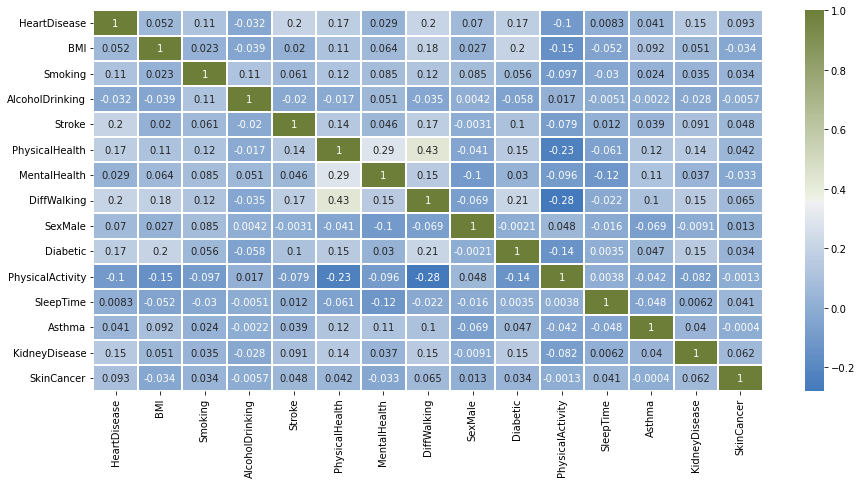

In [12]:
cmap = sns.diverging_palette(250, 100, as_cmap=True)
fig, ax = plt.subplots(1,1, figsize=(15,7))
sns.heatmap(df.corr(),annot = True, cmap=cmap, ax=ax, linewidth=2);

### Correliation matrix does not show a clear linear dependence.

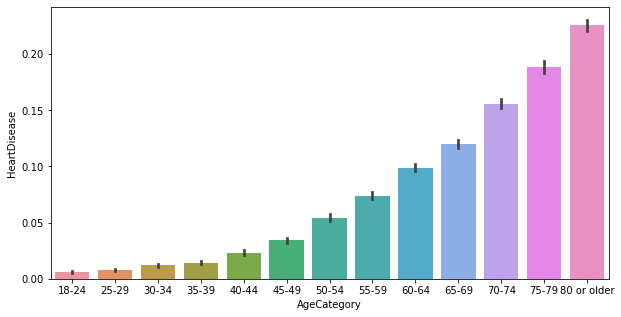

In [13]:
result = df.groupby(["AgeCategory"])['HeartDisease'].median().reset_index().sort_values('HeartDisease')

fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.barplot(x="AgeCategory", y="HeartDisease", data=df, ax=ax, order=result['AgeCategory']);

### As we well know age have significant impact to health. What about smoking?

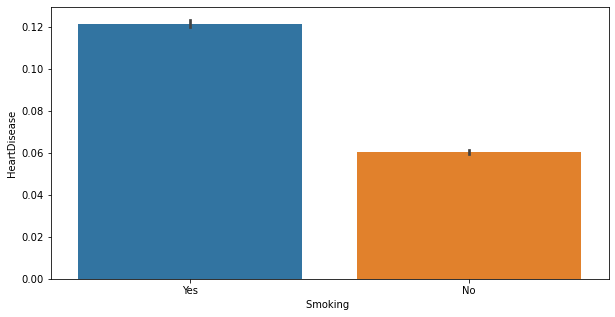

In [14]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.barplot(y='HeartDisease', x='Smoking ', data=df);

#### Smokers have heart diseases around twice more. Is alcohol also have affect?

In [15]:
df.groupby(['Alcohol Drinking','Smoking '])[['HeartDisease']].mean().round(3)

HeartDisease
Alcohol Drinking Smoking               
No               No               0.062
                 Yes              0.128
Yes              No               0.030
                 Yes              0.066

#### Alcohol isn't significant key to heart diseases. 

## Are older smokers or those with other diseases are at higher risk?

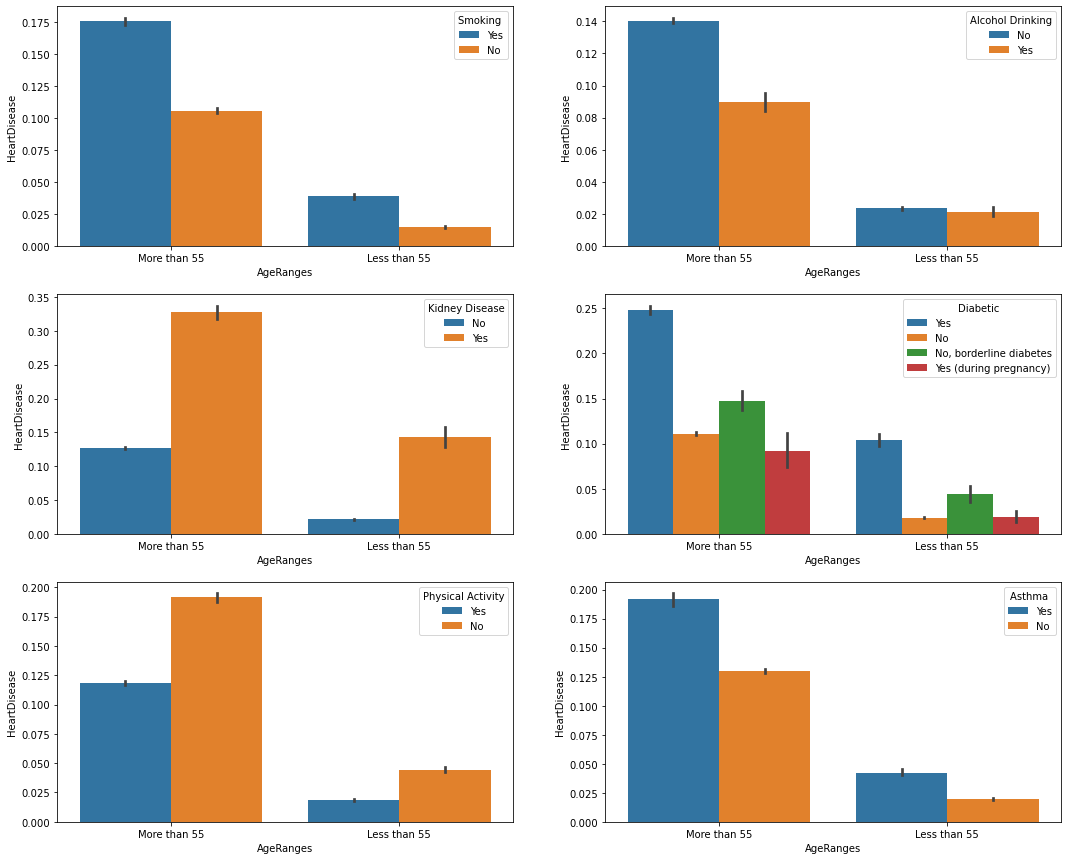

In [16]:
def age_ranges(AgeCategory):
    if AgeCategory in ('18-24','25-29', '30-34', '35-39','40-44','45-49','50-54'):
        return 'Less than 55'
    elif AgeCategory in ('55-59','60-64', '65-69', '70-74','75-79', '80 or older'):
        return 'More than 55'
df['AgeRanges'] = df['AgeCategory'].map(age_ranges)

fig, ax = plt.subplots(3,2, figsize=(18,15))

sns.barplot(x='AgeRanges', y='HeartDisease', hue='Smoking ', data=df, ax=ax[0,0]);
sns.barplot(x='AgeRanges', y='HeartDisease', hue='Alcohol Drinking', data=df, ax=ax[0,1])
sns.barplot(x='AgeRanges', y='HeartDisease', hue='Kidney Disease', data=df, ax=ax[1,0])
sns.barplot(x='AgeRanges', y='HeartDisease', hue='Diabetic ', data=df, ax=ax[1,1]);
sns.barplot(x='AgeRanges', y='HeartDisease', hue='Physical Activity', data=df, ax=ax[2,0])
sns.barplot(x='AgeRanges', y='HeartDisease', hue='Asthma ', data=df, ax=ax[2,1]);

#### 17.5% of 55+ age smokers have heart problems. But diabetics and kidney problems having 55+ age group persons have higher heart disease rates.

## How overweight is affecting heart diseases? 

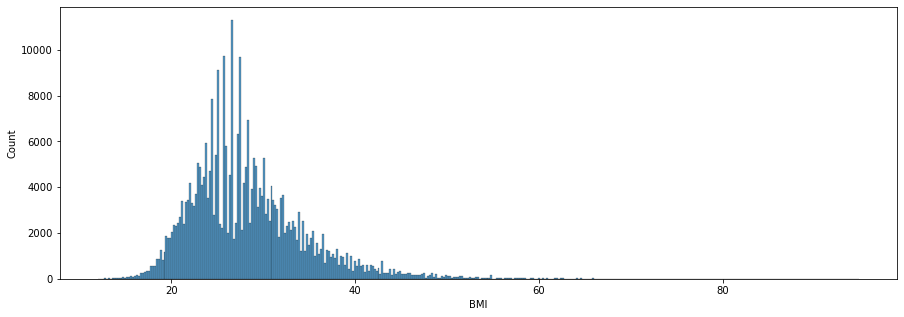

In [17]:
fig, ax = plt.subplots(1,1, figsize=(15,5))
sns.histplot(df, x="BMI",ax=ax);

<AxesSubplot:xlabel='BMIRanges', ylabel='HeartDisease'>

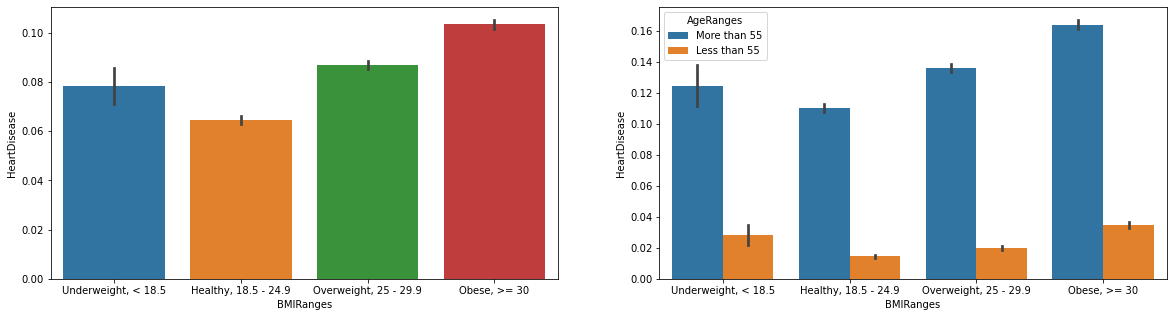

In [18]:
def BMI_ranges(BMI):
    if BMI < 18.5:
        return 'Underweight, < 18.5'
    elif BMI < 24.9:
        return 'Healthy, 18.5 - 24.9'
    elif BMI < 29.9:
        return 'Overweight, 25 - 29.9'
    else:
        return 'Obese, >= 30'
    
df['BMIRanges'] = df['BMI'].map(BMI_ranges)

fig, ax = plt.subplots(1,2, figsize=(20,5))
sns.barplot(x='BMIRanges', y='HeartDisease',  data=df, ax=ax[0]);
sns.barplot(x='BMIRanges', y='HeartDisease', hue='AgeRanges',  data=df, ax=ax[1])

### Is there are significan inpact of alcohol, smoking and BMI to heart diseases?

Only smoking has significan impact.

# Logistic model to predict the heart disease

In [19]:
# Adding additinional data for more precise prediction
convert = df_raw[['AgeCategory','Race','GenHealth']]
dummies = pd.get_dummies(convert)
df.drop(list(convert.columns), axis=1, inplace=True)
df = pd.concat([df, dummies], axis=1)

In [20]:
df = df.rename(columns = {'AgeCategory_18-24':'AgeCategory_18_24', 'AgeCategory_25-29':'AgeCategory_25_29',
                          'AgeCategory_30-34':'AgeCategory_30_34', 'AgeCategory_35-39':'AgeCategory_35_39',
                          'AgeCategory_40-44':'AgeCategory_40_44', 'AgeCategory_45-49':'AgeCategory_45_49',
                          'AgeCategory_50-54':'AgeCategory_50_54', 'AgeCategory_55-59':'AgeCategory_55_59',
                          'AgeCategory_60-64':'AgeCategory_60_64', 'AgeCategory_65-69':'AgeCategory_65_69',
                          'AgeCategory_70-74':'AgeCategory_70_74', 'AgeCategory_75-79':'AgeCategory_75_79',
                          'AgeCategory_80 or older':'AgeCategory_80_or_older',
                          'Race_American Indian/Alaskan Native':'Race_American_Indian',
                          'GenHealth_Very good':'GenHealth_Very_good'})

In [21]:
columns = ['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke','PhysicalHealth', 'MentalHealth', 'DiffWalking', 'SexMale',
           'Diabetic', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer','AgeCategory_18_24',
           'AgeCategory_25_29', 'AgeCategory_30_34', 'AgeCategory_35_39' , 'AgeCategory_40_44', 'AgeCategory_45_49',
           'AgeCategory_50_54', 'AgeCategory_55_59' , 'AgeCategory_60_64', 'AgeCategory_65_69' , 'AgeCategory_70_74',
           'AgeCategory_75_79', 'AgeCategory_80_or_older','Race_American_Indian', 'Race_Black',
            'Race_Other', 'Race_White', 'GenHealth_Excellent','GenHealth_Fair', 'GenHealth_Good','GenHealth_Poor',                  
   'GenHealth_Very_good']

In [22]:
X=df[columns]
y=df['HeartDisease']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [24]:
logistic = LogisticRegression(max_iter=10000, class_weight = 'balanced')

In [25]:
logistic.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=10000)

In [26]:
predictions = logistic.predict(X_test)

In [27]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.75      0.85     58459
           1       0.23      0.78      0.35      5500

    accuracy                           0.75     63959
   macro avg       0.60      0.77      0.60     63959
weighted avg       0.91      0.75      0.80     63959



#### Model precision is too low for practical use.

#### Let's see how variables are impacting model.



In [33]:
model = smf.GLM(list(y_train), smf.add_constant(X_train), smf.families.Binomial())

In [34]:
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:               255836
Model:                            GLM   Df Residuals:                   255802
Model Family:                Binomial   Df Model:                           33
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -58057.
Date:                Thu, 02 Jun 2022   Deviance:                   1.1611e+05
Time:                        16:21:48   Pearson chi2:                 2.42e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -3.1327      0.047    -66.406      0.000      -3.225      -3.040
BMI                         0.0088      0.001      6.948      0.000       0.006       0.011
Smoking                     0.3579      0.016     22.301      0.000       0.326       0.389
AlcoholDrinking            -0.2574      0.038     -6.806      0.000      -0.332      -0.183
Stroke                      1.0335      0.025     40.926      0.000       0.984       1.083
PhysicalHealth              0.0029      0.001      3.016      0.003       0.001       0.005
MentalHealth                0.0038      0.001      3.816      0.000       0.002       0.006
DiffWalking                 0.2159      0.020     10.766      0.000       0.177       0.255
SexMale                     0.7084      0.016     43.681      0.000       0.677       0.740
Diabetic                    0.4579      0.018     24.922      0.000       0.422       0.494
SleepTime                  -0.0246      0.005     -5.084      0.000      -0.034      -0.015
Asthma                      0.2766      0.021     12.867      0.000       0.234       0.319
KidneyDisease               0.5618      0.027     20.563      0.000       0.508       0.615
SkinCancer                  0.0992      0.022      4.547      0.000       0.056       0.142
AgeCategory_18_24          -1.8715      0.094    -19.919      0.000      -2.056      -1.687
AgeCategory_25_29          -1.7222      0.092    -18.666      0.000      -1.903      -1.541
AgeCategory_30_34          -1.3694      0.072    -19.020      0.000      -1.511      -1.228
AgeCategory_35_39          -1.3011      0.065    -20.102      0.000      -1.428      -1.174
AgeCategory_40_44          -0.8342      0.051    -16.470      0.000      -0.934      -0.735
AgeCategory_45_49          -0.5236      0.043    -12.277      0.000      -0.607      -0.440
AgeCategory_50_54          -0.1024      0.033     -3.074      0.002      -0.168      -0.037
AgeCategory_55_59           0.1359      0.028      4.779      0.000       0.080       0.192
AgeCategory_60_64           0.3919      0.025     15.620      0.000       0.343       0.441
AgeCategory_65_69           0.6514      0.024     27.325      0.000       0.605       0.698
AgeCategory_70_74           0.9110      0.023     38.816      0.000       0.865       0.957
AgeCategory_75_79           1.1238      0.025     44.207      0.000       1.074       1.174
AgeCategory_80_or_older     1.3776      0.024     56.449      0.000       1.330       1.425
Race_American_Indian        0.3224      0.064      5.014      0.000       0.196       0.448
Race_Black                 -0.0574      0.043     -1.331      0.183      -0.142       0.027
Race_Other                  0.2561      0.053      4.838      0.000       0.152       0.360
Race_White                  0.2280      0.032  

#### Stroke and age 75+ has strongest weight. Smoking coefficient is significant smaller than specific age or concomitant diseases.  And black race even should be removed from model at all.

Thank you for your attention!